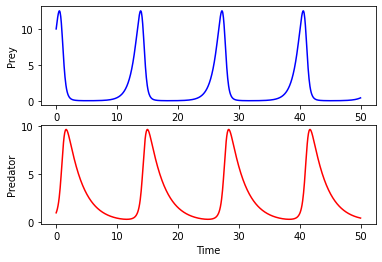

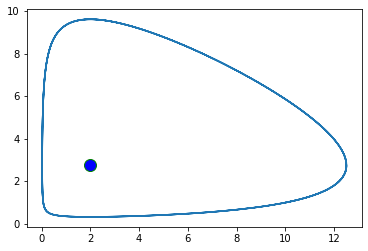

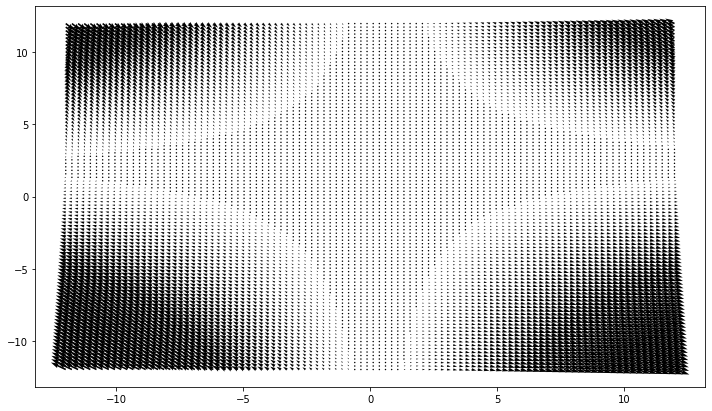

In [1]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint


initial_populations = [10,1] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Pick rates that lead to periodicity
####################################
prey_growth_rate = 1.1 # natural prey growth rate
prey_death_rate = 0.4 # of all pred/prey pairs (their multiple), how much prey death?
predator_growth_rate = 0.2 # of all pred/prey pairs (their multiple), how much predator growth?
predator_death_rate = 0.4 # natural predator death rate

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds


params = [prey_growth_rate, prey_death_rate, predator_growth_rate, predator_death_rate]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    # prey population level
    prey_count = current_counts[0]

    # predatory population level
    predator_count = current_counts[1]


    prey_growth_rate = params[0]
    prey_death_rate = params[1]
    predator_growth_rate = params[2]
    predator_death_rate = params[3]

    dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
    dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)
    return([dxdt, dydt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
f,(prey,predator) = plt.subplots(2)

line1, = prey.plot(t,solutions[:,0], color="b")
line2, = predator.plot(t,solutions[:,1], color="r")

prey.set_ylabel("Prey")
predator.set_ylabel("Predator")
predator.set_xlabel("Time")

plt.show()

# Added phase diagram
plt.plot(solutions[:,0], solutions[:,1])
# Show the fixed point
plt.plot(predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12) #the fixed point
plt.show()

# ANOTHER Phase Diagram
# Creating data set
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
#plt.streamplot(X, Y, U, V, density = 1)
plt.quiver(X,Y,U,V)
  
# show plot
plt.show()

In [2]:
# DETERMINE STABILITY OF A FIXED POINT
######################################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Remember our constant params
##############################
prey_growth_rate = 1.1
prey_death_rate = 0.4
predator_growth_rate = 0.2
predator_death_rate = 0.4

# temp dummy values, so I can type & run this
x = 1
y = 1
# Remember our differentials
# for clarity, 'x' will now be 'prey_count', y will be 'predator_count'
#######################################################################
# dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
dxdt = (prey_growth_rate * x) - (prey_death_rate * x * y)
# dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)
dydt = (predator_growth_rate * x * y) - (predator_death_rate * y)

# What is the Jacobian of this system of equations?
# It's a 2 x 2 matrix of the right-sides, partially differentiated against x and partially differentiated against y
# The first row of the Jacobian will be '(prey_growth_rate * x) - (prey_death_rate * x * y)'
#     differentiated against x, and then against y
# Against x, it becomes
#     prey_growth_rate - prey_death_rate*y
# Against y, it becomes
#     prey_death_rate*x
#
# So, the first row of the Jacobian is
#     prey_growth_rate - prey_death_rate*y , prey_death_rate*x
#
#
# The SECOND row of the Jacobian will be '(predator_growth_rate * x * y) - (predator_death_rate * y)'
#     differentiated against x, and then against y
# Against x, it becomes
#     predator_growth_rate*y
# Against y, it becomes
#     predator_growth_rate*x - predator_death_rate
#
# So, the second row of the Jacobian is
#     predator_growth_rate*y , predator_growth_rate*x - predator_death_rate
#
#
# The completed Jacobian looks like this:
J = [[prey_growth_rate - prey_death_rate*y, prey_death_rate*x],
     [predator_growth_rate*y,               predator_growth_rate*x - predator_death_rate]]

# This Jacobian applies to ANY point, but we're interested in a particular fixed point
# From the original differentials,
#    dxdt = (prey_growth_rate * x) - (prey_death_rate * x * y)
#    dydt = (predator_growth_rate * x * y) - (predator_death_rate * y)
# we see that there are 2 points where it's ZERO
#
# FIXED POINTS
# x = y = 0, or
# x = predator_death_rate/predator_growth_rate (=2) , y = prey_growth_rate/prey_death_rate (=2.75)
#
# Substitute in the fixed point coordinates into the Jacobian
J = [[prey_growth_rate - prey_death_rate*2.75, prey_death_rate*2],
     [predator_growth_rate*2.75,               predator_growth_rate*2 - predator_death_rate]]
# Hell, substitute ALL the param values into the Jacobian
J = [[1.1 - 0.4*2.75, 0.4*2],
     [0.2*2.75,       0.2*2 - 0.4]]
# that is,
J = [[0,    0.8],
     [0.55, 0]]


w,v = np.linalg.eig(J)
#Eigenvalues
print(w)
#Eigenvectors
#print(v)

# We see the eigenvalues are real and opposite signs
# Half is pulling in, half is pulling away
# [ 0.66332496 -0.66332496]
# Therefore, UNSTABLE

      



[ 0.66332496 -0.66332496]


# Two domain inhibitory network from paper

In [1]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *
from math import isclose

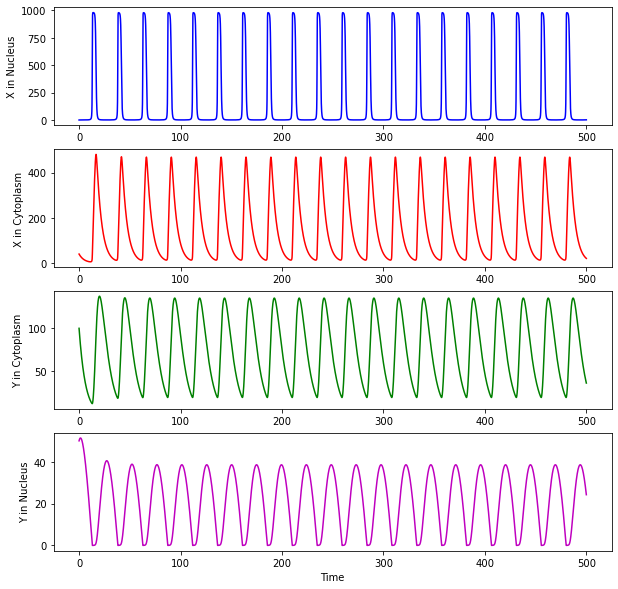

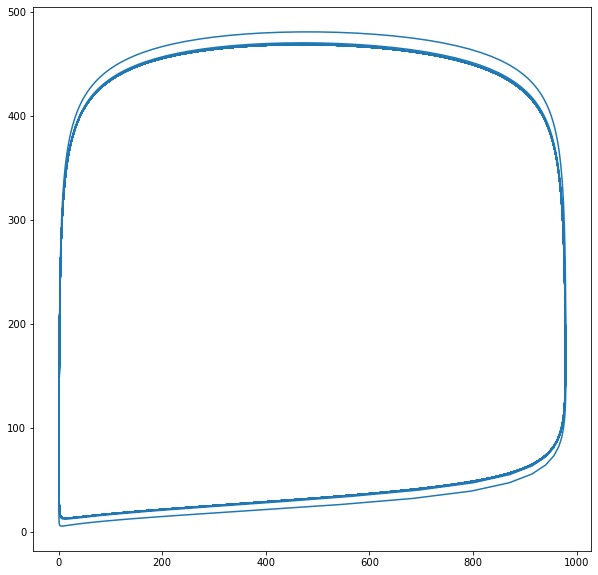

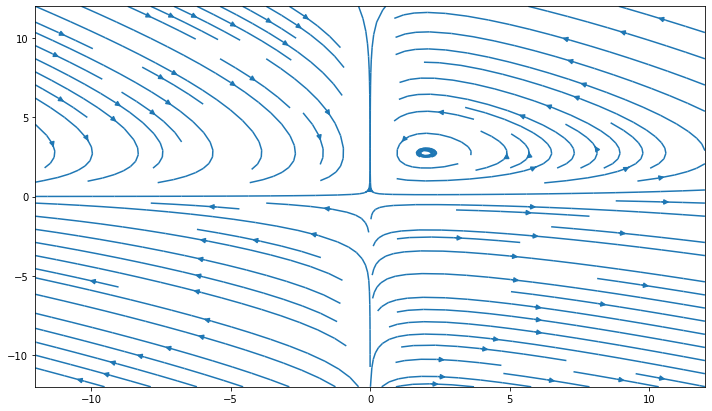

In [4]:
initial_populations = [0,40,100,50] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,500,num=10000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

sig=1000
p=2
kdxn=10
kexport=0.2
kdxc=0.2
eps=1
kdyn=8
kdyc=0.1
Km=0.1
kimport=0.1

params = [sig, p, kdxn, kexport, kdxc, eps, kdyn, kdyc, Km, kimport]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    #xn = 100
    xn = current_counts[0]
    xc = current_counts[1]
    
    yc = current_counts[2]
    yn = current_counts[3]


    sig = params[0]
    p = params[1]
    kdxn = params[2]
    kexport = params[3]
    kdxc = params[4]
    eps = params[5]
    kdyn = params[6]
    kdyc = params[7]
    Km = params[8]
    kimport = params[9]

    dxn_dt = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
    dxc_dt = eps*kexport*xn - kdxc*xc
    dyc_dt = kdyc*(xc - yc) - eps*kimport*yc 
    dyn_dt = (kimport*yc) - (kdyn*yn/(Km + yn))




    return([dxn_dt, dxc_dt, dyc_dt, dyn_dt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
f,(xn,xc,yc,yn) = plt.subplots(4, figsize = (10,10))

line1, = xn.plot(t,solutions[:,0], color="b")
line2, = xc.plot(t,solutions[:,1], color="r")
line3, = yc.plot(t,solutions[:,2], color="g")
line4, = yn.plot(t,solutions[:,3], color="m")

xn.set_ylabel("X in Nucleus")
xc.set_ylabel("X in Cytoplasm")
yc.set_ylabel("Y in Cytoplasm")
yn.set_ylabel("Y in Nucleus")
yn.set_xlabel("Time")

plt.show()

# Added phase diagram
plt.figure(figsize=(10,10))
plt.plot(solutions[:,0], solutions[:,1])
# Show the fixed point
#plt.plot(predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate, color='green', linestyle='dashed', linewidth = 3,
         #marker='o', markerfacecolor='blue', markersize=12) #the fixed point
plt.show()

# ANOTHER Phase Diagram
# Creating data set
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(X, Y, U, V, density = 1)
  
# show plot
plt.show()

# Time Series Plot

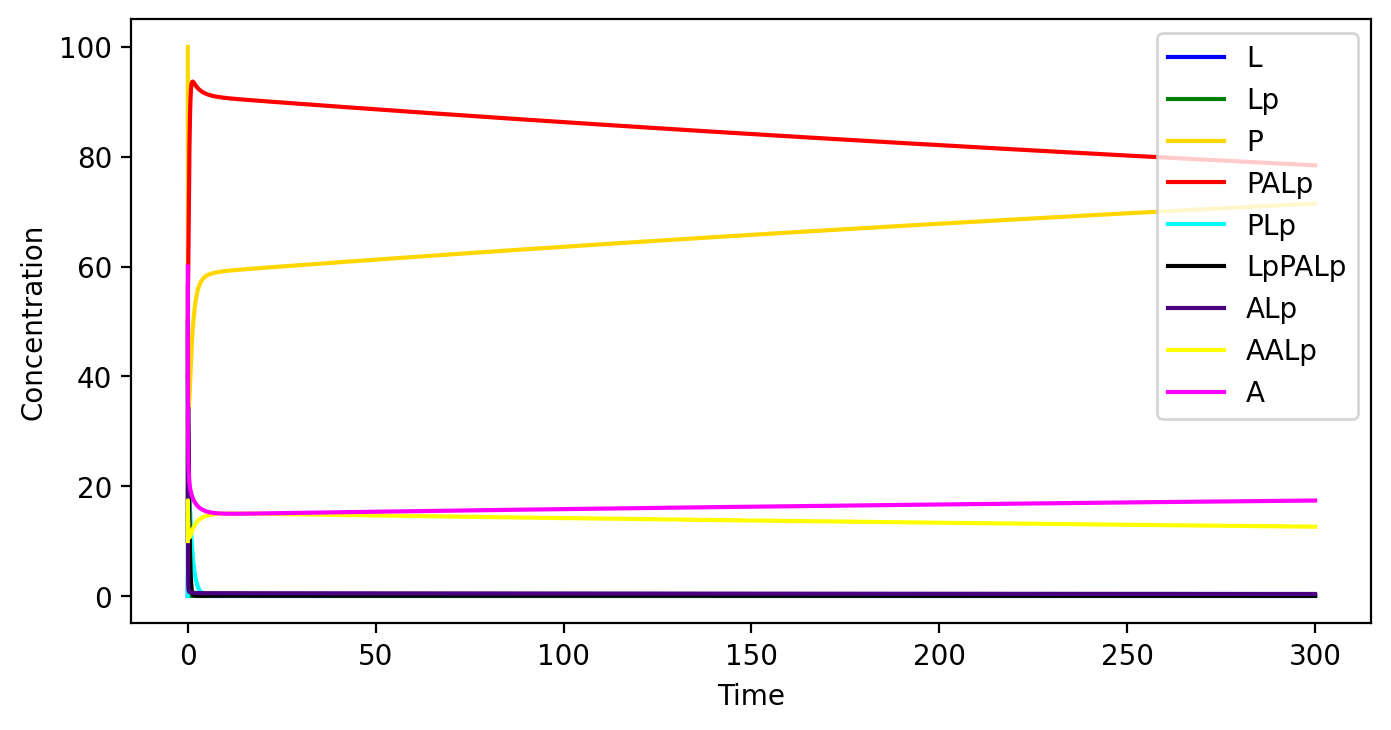

In [61]:
initial_populations = [0,40,100,40,0,10,50,10,60] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,300,num=10000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

ka2 = 0.2
kb2 = 0.1

ka3 = 0.6
kb3 = 0.1 

ka4 = 0.2
kb4 = 0.1
kcat4 = 1

ka5 = 0.3
kb5 = 0.1
kcat5 = 2

ka6 = 0.4
kb6 = 0.2

ka7 = 0.6
kb7 = 0.2

ka8 = 0.4
kb8 = 0.1
kcat8 = 5

Km4 = (kb4 + kcat4)/ka4
Km5 = (kb5 + kcat5)/ka5
Km8 = (kb8 + kcat8)/kb8

K = 100


params = [ka2,kb2,ka3,kb3,ka4,kb4,kcat4,ka5,kb5,kcat5,ka6,kb6,ka7,kb7,ka8,kb8,kcat8,Km4,Km5,Km8,K]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0]
    Lp = current_counts[1]
    
    P = current_counts[2]
    PALp = current_counts[3]

    PLp = current_counts[4]
    LpPALp = current_counts[5]

    ALp = current_counts[6]
    AALp = current_counts[7]
    A = current_counts[8]



    ka2 = params[0]
    kb2 = params[1]

    ka3 = params[2]
    kb3 = params[3]

    ka4 = params[4]
    kb4 = params[5]
    kcat4 = params[6]

    ka5 = params[7]
    kb5 = params[8]
    kcat5 = params[9]

    ka6 = params[10]
    kb6 = params[11]

    ka7 = params[12]
    kb7 = params[13]

    ka8 = params[14]
    kb8 = params[15]
    kcat8 = params[16]

    Km4 = params[17]
    Km5 = params[18]
    Km8 = params[19]

    K = params[20]

    dL = (kcat4*P*(Lp/(Km4+Lp))) + (kcat8*PALp*(Lp/(Km8+Lp)))-(kcat5*K*(L/(Km5+L)))
    dLp = (kcat5*K*(L/(Km5+L))) - (kcat8*PALp*(Lp/(Km8+Lp))) - (kcat4*P*(Lp/(Km4+Lp)))+(kb2*ALp)-(ka2*Lp*A)+(kb3*ALp**2)-(ka3*Lp*AALp)
    dP = (kcat4*PLp) + (kb4*PLp) - (ka4*Lp*P)-(ka7*P*ALp)+(kb7*PALp) 
    dPALp = (ka7*P*ALp)-(kb7*PALp)+(kcat8*LpPALp)+(kb8*LpPALp)-(ka8*Lp*PALp)
    dPLp = (ka4*Lp*P)-(kb4*PLp)-(kcat4*PLp)
    dLpPALp = (ka8*Lp*PALp)-(kb8*LpPALp)-(kcat8*LpPALp)
    dALp = (ka2*Lp*A)-(kb2*ALp)-(ka6*A*ALp)+(kb6*AALp)-(ka7*P*ALp)+(kb7*PALp)#+(2*ka3*Lp*AALp)
    dAALp = (ka6*A*ALp)-(kb6*AALp)-(ka3*Lp*AALp)+(kb3*ALp**2)
    dA = (kb2*ALp)-(ka2*Lp*A)+(kb6*AALp)-(ka6*A*ALp)



    return([dL, dLp, dP, dPALp, dPLp, dLpPALp, dALp, dAALp, dA])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'P')
plt.plot(t,solutions[:,3], color="r", label = 'PALp')
plt.plot(t,solutions[:,4], color="cyan", label = 'PLp')
plt.plot(t,solutions[:,5], color="black", label = 'LpPALp')
plt.plot(t,solutions[:,6], color="indigo", label = 'ALp')
plt.plot(t,solutions[:,7], color="yellow", label = 'AALp')
plt.plot(t,solutions[:,8], color="magenta", label = 'A')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()

plt.show()



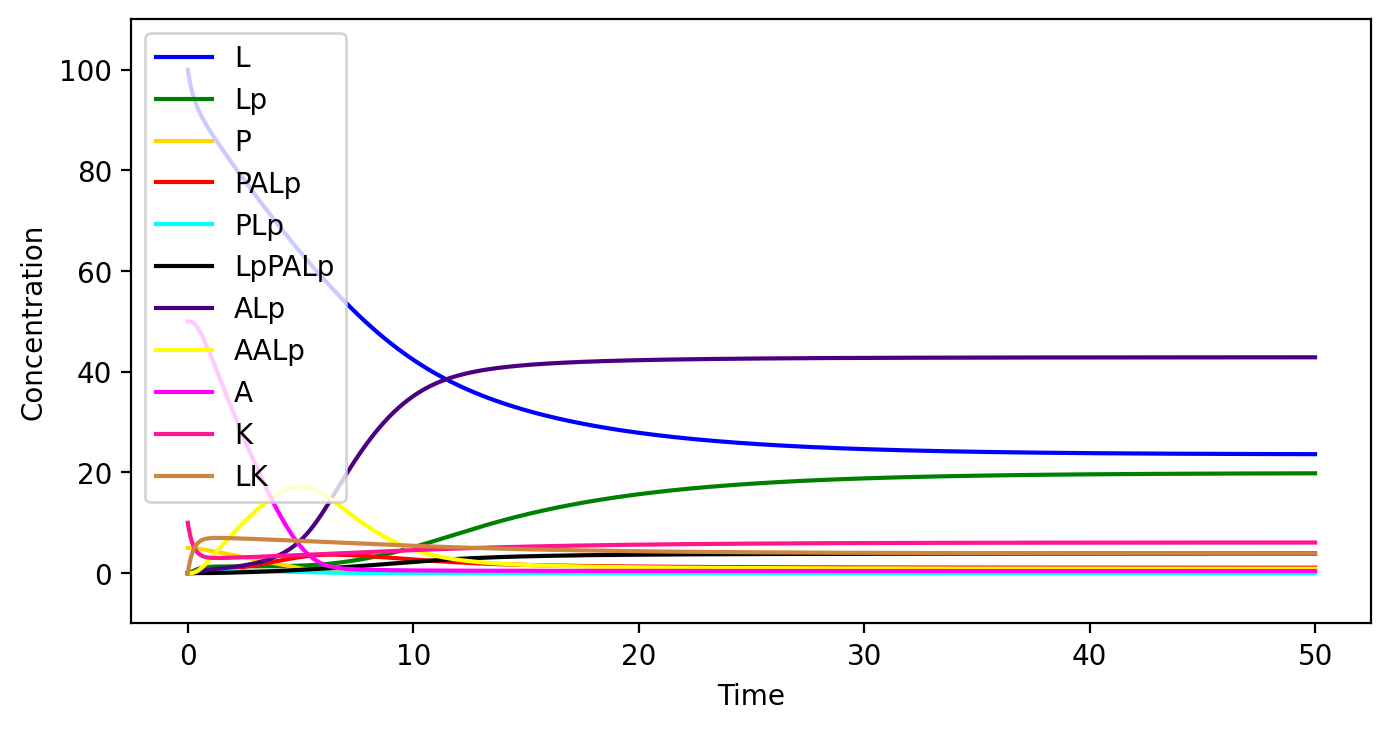

In [28]:
#L, Lp, P, PALp, PLp, LpPALp, ALp, AALp, A, K, LK
initial_populations = [100,0,5,0,0,0,0,0,50,10,0] 

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

ka2 = 0.1#0.1
kb2 = 0.1#0.1

ka3 = ka2*2
kb3 = 0#0.1 

ka4 = 0.1
kb4 = 0.1
kcat4 = 1

ka5 = 0.03
kb5 = 0.1
kcat5 = 1

ka6 = ka2*2
kb6 = 0.1#0.2

ka7 = ka4*2
kb7 = 0.1#0.2

ka8 = ka4*2
kb8 = 0.1#0.1
kcat8 = 1#1


params = [ka2,kb2,ka3,kb3,ka4,kb4,kcat4,ka5,kb5,kcat5,ka6,kb6,ka7,kb7,ka8,kb8,kcat8]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0]
    Lp = current_counts[1]
    
    P = current_counts[2]
    PALp = current_counts[3]

    PLp = current_counts[4]
    LpPALp = current_counts[5]

    ALp = current_counts[6]
    AALp = current_counts[7]
    A = current_counts[8]
    K = current_counts[9] 
    LK = current_counts[10]



    ka2 = params[0]
    kb2 = params[1]

    ka3 = params[2]
    kb3 = params[3]

    ka4 = params[4]
    kb4 = params[5]
    kcat4 = params[6]

    ka5 = params[7]
    kb5 = params[8]
    kcat5 = params[9]

    ka6 = params[10]
    kb6 = params[11]

    ka7 = params[12]
    kb7 = params[13]

    ka8 = params[14]
    kb8 = params[15]
    kcat8 = params[16]

    dL = (kcat4*PLp)+(kcat8*LpPALp)+(kb5*LK)-(ka5*L*K)
    dLp = (kcat5*LK) + (kb2*ALp)+(kb3*ALp**2)+(kb4*PLp)+(kb8*LpPALp)-(ka4*Lp*P)-(ka8*Lp*PALp)-(ka3*Lp*AALp)-(ka2*Lp*A)
    dP = (kcat4*PLp) + (kb4*PLp) - (ka4*Lp*P)-(ka7*P*ALp)+(kb7*PALp) 
    dPALp = (ka7*P*ALp)-(kb7*PALp)+(kcat8*LpPALp)+(kb8*LpPALp)-(ka8*Lp*PALp)
    dPLp = (ka4*Lp*P)-(kb4*PLp)-(kcat4*PLp)
    dLpPALp = (ka8*Lp*PALp)-(kb8*LpPALp)-(kcat8*LpPALp)
    dALp = (ka2*Lp*A)-(kb2*ALp)-(ka6*A*ALp)+(kb6*AALp)-(ka7*P*ALp)+(kb7*PALp)+(2*ka3*Lp*AALp)
    dAALp = (ka6*A*ALp)-(kb6*AALp)-(ka3*Lp*AALp)+(kb3*ALp**2)
    dA = (kb2*ALp)-(ka2*Lp*A)+(kb6*AALp)-(ka6*A*ALp)
    dK = (kcat5*LK)+(kb5*LK)-(ka5*L*K)
    dLK = (ka5*L*K)-(kcat5*LK)-(kb5*LK)



    return([dL, dLp, dP, dPALp, dPLp, dLpPALp, dALp, dAALp, dA, dK, dLK])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'P')
plt.plot(t,solutions[:,3], color="r", label = 'PALp')
plt.plot(t,solutions[:,4], color="cyan", label = 'PLp')
plt.plot(t,solutions[:,5], color="black", label = 'LpPALp')
plt.plot(t,solutions[:,6], color="indigo", label = 'ALp')
plt.plot(t,solutions[:,7], color="yellow", label = 'AALp')
plt.plot(t,solutions[:,8], color="magenta", label = 'A')
plt.plot(t,solutions[:,9], color="deeppink", label = 'K')
plt.plot(t,solutions[:,10], color="peru", label = 'LK')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.ylim(top=110, bottom = -10)
plt.legend()

plt.show()



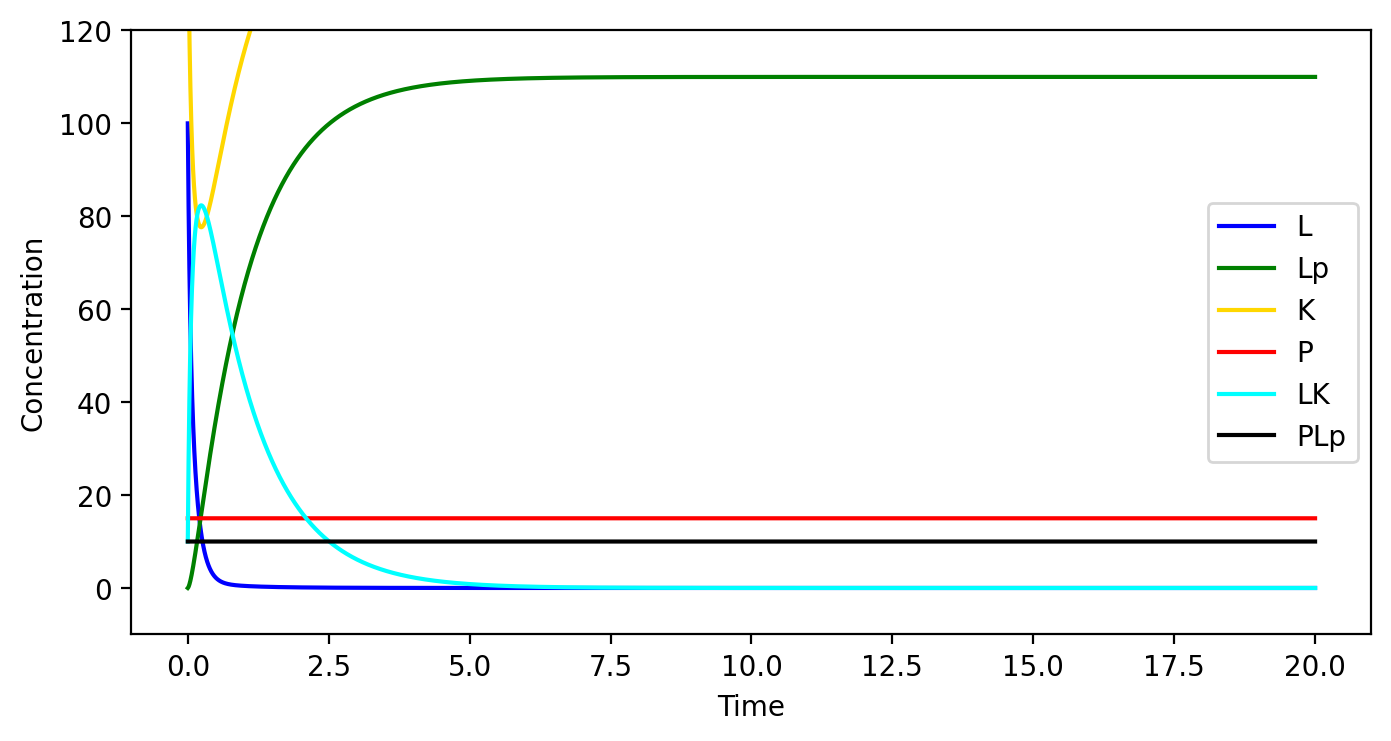

In [7]:
#L, Lp, P, PALp, PLp, LpPALp, ALp, AALp, A, K, LK
initial_populations = [100, 0, 150, 15,10,10]

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,20,num=10000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

ka1 = 0.1
kb1 = 0.1
kcat1 = 1

ka2 = 0
kb2 = 0
kcat2 = 0


params = [ka1,kb1,kcat1,ka2,kb2,kcat2]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0]
    Lp = current_counts[1]
    
    K = current_counts[2]
    P = current_counts[3]
    
    LK = current_counts[4]
    PLp = current_counts[5]
    



    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]

    ka2 = params[3]
    kb2 = params[4]
    kcat2 = params[5]
    

    dL = (kb1*LK) + (kcat2*PLp)- (ka1*L*K) 
    dLp = (kcat1*LK) + (kb2*PLp) - (ka2*Lp*P)
    dK = (kcat1*LK) + (kb1*LK) - (ka1*L*K)
    dP = (kcat2*PLp) + (kb2*PLp) - (ka2*Lp*P)
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
    dPLp = (ka2*Lp*P) - (kb2*PLp) - (kcat2*PLp)



    return([dL, dLp, dK, dP, dLK, dPLp])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'K')
plt.plot(t,solutions[:,3], color="r", label = 'P')
plt.plot(t,solutions[:,4], color="cyan", label = 'LK')
plt.plot(t,solutions[:,5], color="black", label = 'PLp')


plt.xlabel('Time')
plt.ylabel('Concentration')
plt.ylim(top=120, bottom = -10)
plt.legend()

plt.show()



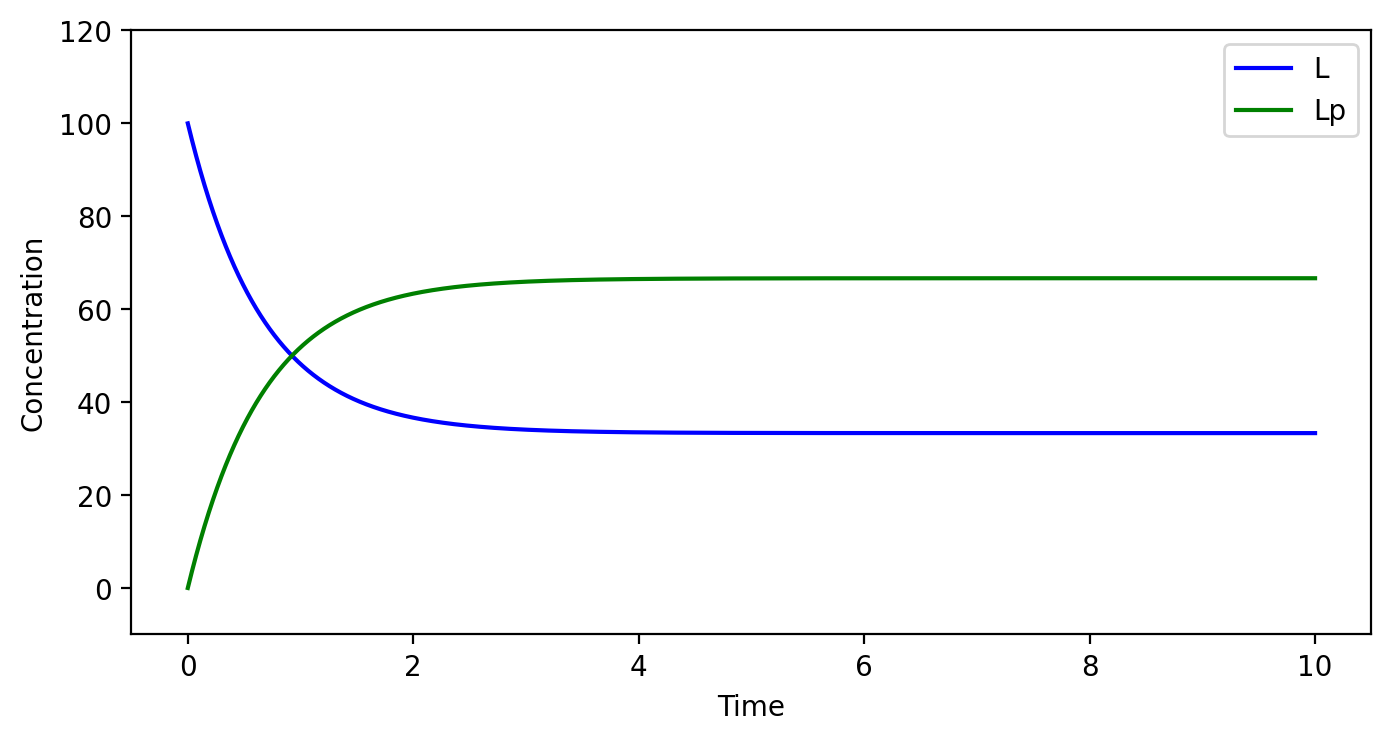

In [9]:
#L, Lp, P, PALp, PLp, LpPALp, ALp, AALp, A, K, LK
initial_populations = [100, 0]

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,10,num=100000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

ka1 = 1
kb1 = 0.5
#kcat1 = 5

ka2 = 0.2
kb2 = 0.1
#kcat2 = 0


params = [ka1,kb1,ka2,kb2]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0]
    Lp = current_counts[1]




    ka1 = params[0]
    kb1 = params[1]

    

    dL = (kb1*Lp)-(ka1*L) 
    dLp = (ka1*L)-(kb1*Lp)
    



    return([dL, dLp])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
#plt.plot(t,solutions[:,2], color="gold", label = 'K')
#plt.plot(t,solutions[:,3], color="r", label = 'P')
#plt.plot(t,solutions[:,4], color="cyan", label = 'LK')
#plt.plot(t,solutions[:,5], color="black", label = 'PLp')


plt.xlabel('Time')
plt.ylabel('Concentration')
plt.ylim(top=120, bottom = -10)
plt.legend()

plt.show()



# Phase Diagrams

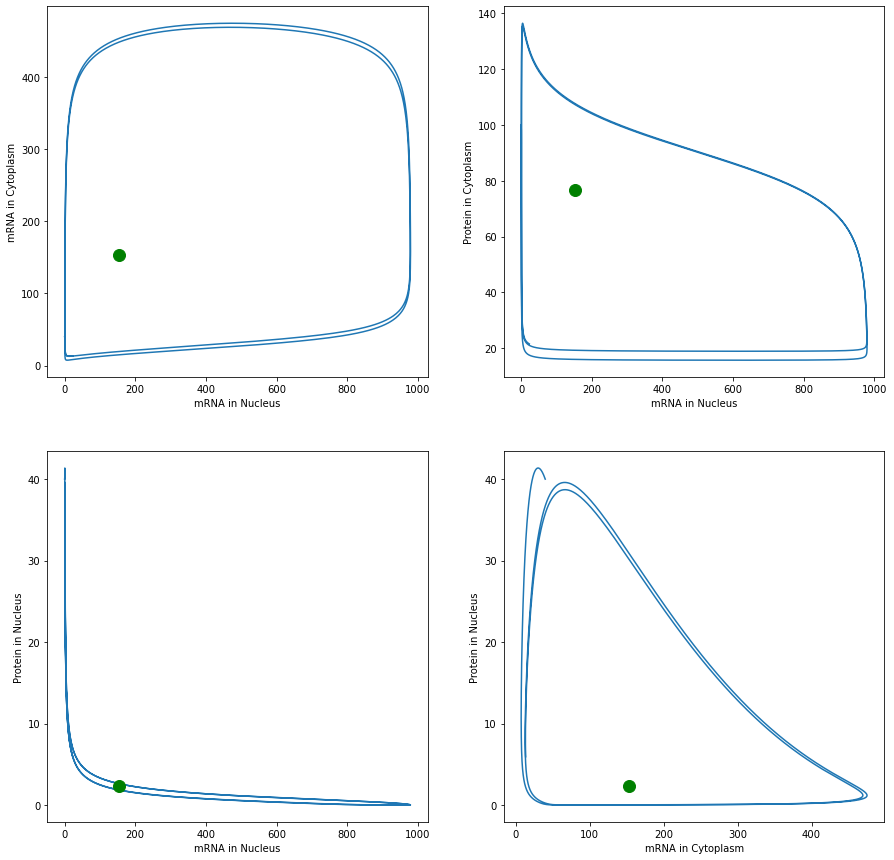

In [6]:


#find fixed points
sig = params[0]
p = params[1]
kdxn = params[2]
kexport = params[3]
kdxc = params[4]
eps = params[5]
kdyn = params[6]
Km = params[7]
kimport = params[8]

xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
eq2 = eps*kexport*xn - kdxc*xc
eq3 = kdyc*(xc - yc) - eps*kimport*yc 
eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

system = [eq1,eq2,eq3,eq4]
init_conc = [initial_populations[0],initial_populations[1],initial_populations[2],initial_populations[3]]
init_sol = np.random.rand(len(init_conc))*max(init_conc)

result = False
while result is False:
    try:
        init_sol = np.random.rand(len(init_conc))*max(init_conc)
        solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True)
        if solution[3] > 0:
            result = True
            break
    except ValueError:
        pass

x_nuc = solution[0]
x_cyt = solution[1]
y_cyt = solution[2]
y_nuc = solution[3]
#solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True)

# Added phase diagram
fig, axs = plt.subplots(2,2, figsize = (15,15))

axs[0,0].plot(solutions[:,0], solutions[:,1])
axs[0,0].plot(x_nuc, x_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[0,0].set_xlabel('mRNA in Nucleus')
axs[0,0].set_ylabel('mRNA in Cytoplasm')

axs[0,1].plot(solutions[:,0], solutions[:,2])
axs[0,1].plot(x_nuc, y_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[0,1].set_xlabel('mRNA in Nucleus')
axs[0,1].set_ylabel('Protein in Cytoplasm')

axs[1,0].plot(solutions[:,0], solutions[:,3])
axs[1,0].plot(x_nuc, y_nuc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[1,0].set_xlabel('mRNA in Nucleus')
axs[1,0].set_ylabel('Protein in Nucleus')

axs[1,1].plot(solutions[:,1], solutions[:,3])
axs[1,1].plot(x_cyt, y_nuc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[1,1].set_xlabel('mRNA in Cytoplasm')
axs[1,1].set_ylabel('Protein in Nucleus')

# Show the fixed point



#plot nullclines

plt.show()



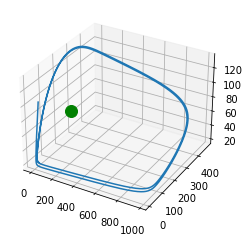

In [11]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot3D(solutions[:,0], solutions[:,1], solutions[:,2])
ax.plot3D(x_nuc,x_cyt,y_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12)


# Everything below is test/junk

In [101]:
sig = params[0]
p = params[1]
kdxn = params[2]
kexport = params[3]
kdxc = params[4]
eps = params[5]
kdyn = params[6]
Km = params[7]
kimport = params[8]

xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
eq2 = eps*kexport*xn - kdxc*xc
eq3 = kdyc*(xc - yc) - eps*kimport*yc 
eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

system = [eq1,eq2,eq3,eq4]
init_conc = [initial_populations[0],initial_populations[1],initial_populations[2],initial_populations[3]]
init_sol = np.random.rand(len(init_conc))*max(init_conc)

solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True, dict=True)

solution

[{xn: 153.393690839455,
  xc: 153.393690839455,
  yc: 76.6968454197277,
  yn: 2.32192722307914}]

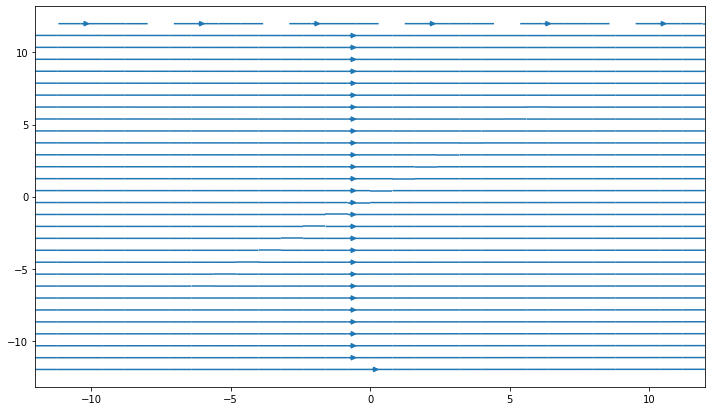

In [143]:
# ANOTHER Phase Diagram
# Creating data set
w = 12
Xc, Xn= np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = kdxn*(sig/(1 + 1**p) - Xn) - kexport*Xn 
#V = 1 + X - Y**2
V = eps*kexport*Xn - kdxc*Xc

#W = kdyc*(Xc - Yc) - eps*kimport*Yc

#X = (kimport*Yc) - (kdyn*Yn/(Km + Yn))
speed = np.sqrt(Xn**2 + Xc**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(Xn, Xc, U, V, density = 1)
  
# show plot
plt.show()

In [133]:
U

array([[122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       ...,
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
     

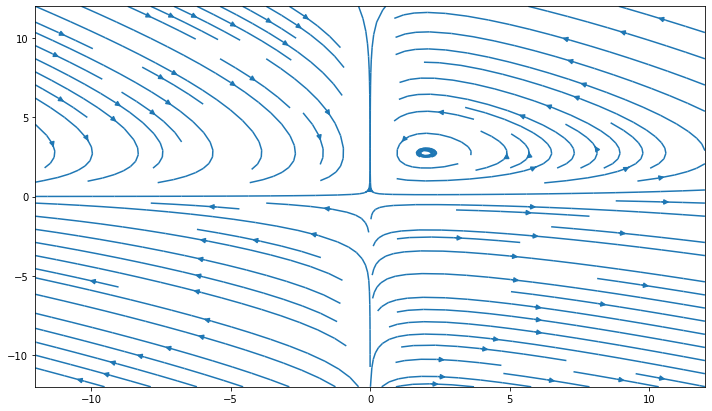

In [122]:
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(X, Y, U, V, density = 1)
  
# show plot
plt.show()

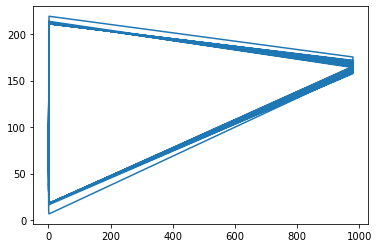

In [251]:
nullcline_xn = []
nullcline_xc = []
nullcline_yc = []
nullcline_yn = []

#def find_nullcline(solutions = solutions, equations = equations):
for i in solutions:
    xn = i[0]
    xc = i[1]
    yc = i[2]
    yn = i[3]

    eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
    eq2 = eps*kexport*xn - kdxc*xc
    eq3 = kdyc*(xc - yc) - eps*kimport*yc 
    eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

    equations = [eq1,eq2,eq3,eq4]
    if isclose(equations[0], 0.0, abs_tol= 1):
        nullcline_xn.append(i)
    if isclose(equations[1], 0.0, abs_tol= 1):
        nullcline_xc.append(i)
    if isclose(equations[2], 0.0, abs_tol= 1):
        nullcline_yc.append(i)
    if isclose(equations[3], 0.0, abs_tol= 1):
        nullcline_yn.append(i)

#### plotting dictionaries for each nullcline, containing lists of each species
null_xn_dict = {}

null_xn_dict[xn] = [item[0] for item in nullcline_xn]
null_xn_dict[xc] = [item[1] for item in nullcline_xn]
null_xn_dict[yc] = [item[2] for item in nullcline_xn]
null_xn_dict[yn] = [item[3] for item in nullcline_xn]

null_xc_dict = {}

null_xc_dict[xn] = [item[0] for item in nullcline_xc]
null_xc_dict[xc] = [item[1] for item in nullcline_xc]
null_xc_dict[yc] = [item[2] for item in nullcline_xc]
null_xc_dict[yn] = [item[3] for item in nullcline_xc]

null_yc_dict = {}

null_yc_dict[xn] = [item[0] for item in nullcline_yc]
null_yc_dict[xc] = [item[1] for item in nullcline_yc]
null_yc_dict[yc] = [item[2] for item in nullcline_yc]
null_yc_dict[yn] = [item[3] for item in nullcline_yc]

null_yn_dict = {}

null_yn_dict[xn] = [item[0] for item in nullcline_yn]
null_yn_dict[xc] = [item[1] for item in nullcline_yn]
null_yn_dict[yc] = [item[2] for item in nullcline_yn]
null_yn_dict[yn] = [item[3] for item in nullcline_yn]

plt.plot(null_xn_dict[xn], null_xn_dict[xc])



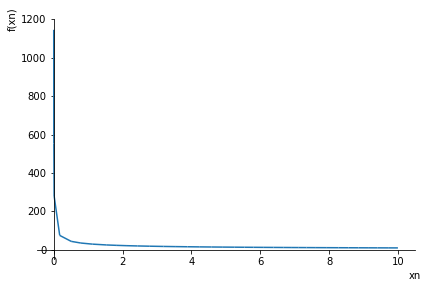

In [15]:
xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 

y = solve(eq1, yn)[1]
plot(y, (xn, -10, 10))

In [245]:
o = [item[0] for item in nullcline_xn]
o

[0.0,
 0.1562807939542653,
 0.24952034846918228,
 0.30493373286652264,
 0.3376610822973963,
 0.35679294668621325,
 0.3677873220386399,
 0.3739210179166555,
 0.3771611292864323,
 0.3786883474902538,
 0.3792111772407214,
 0.3791546058318084,
 0.3787734093289591,
 0.3782201730682121,
 0.3775861399915427,
 0.37692573866923257,
 0.37627130993595903,
 0.37564194638256954,
 0.3750488083905645,
 0.37449830475530965,
 0.3739940060855371,
 0.37353779913036345,
 0.373130563910286,
 0.37277260382812677,
 0.37246388038500844,
 0.37220416463957295,
 0.3719931314801333,
 0.3718304031579153,
 0.37171558737219884,
 0.3716482935435896,
 0.3716281443977702,
 0.371654781647152,
 0.37172787003821733,
 0.3718470988875099,
 0.37201218310490325,
 0.3722228634203427,
 0.3724789062015207,
 0.3727801035173191,
 0.37312627198251425,
 0.37351725439916994,
 0.3739529181432245,
 0.3744331546317068,
 0.37495787941179765,
 0.37552703190375725,
 0.3761405750282818,
 0.3767984947396074,
 0.377500800328248,
 0.3782475240

In [ ]:
eq1 = kdxn*(sig/(1 + 0**p) - xn) - kexport*xn 

solve(eq1, xn)

In [ ]:
for i in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

In [193]:

for i in solutions:
    print(i)

[  0.  40. 100.  50.]
[ 0.15628079 39.60279909 99.2029154  50.09881229]
[ 0.24952035 39.21076519 98.41179956 50.19365215]
[ 0.30493373 38.82335585 97.62661735 50.28454943]
[ 0.33766108 38.44023046 96.8473318  50.37153375]
[ 0.35679295 38.06116978 96.07390498 50.45463459]
[ 0.36778732 37.68602756 95.30629843 50.53388121]
[ 0.37392102 37.31470155 94.54447344 50.60930267]
[ 0.37716113 36.94711603 93.78839127 50.68092786]
[ 0.37868835 36.58321137 93.03801324 50.74878545]
[ 0.37921118 36.22293773 92.29330078 50.81290394]
[ 0.37915461 35.86625128 91.55421545 50.87331162]
[ 0.37877341 35.51311192 90.82071901 50.93003659]
[ 0.37822017 35.16348196 90.09277339 50.98310677]
[ 0.37758614 34.81732526 89.37034073 51.03254986]
[ 0.37692574 34.47460675 88.65338337 51.07839341]
[ 0.37627131 34.13529211 87.94186383 51.12066475]
[ 0.37564195 33.79934766 87.23574486 51.15939103]
[ 0.37504881 33.46674014 86.53498941 51.19459924]
[ 0.3744983  33.13743677 85.83956061 51.22631614]
[ 0.37399401 32.81140509 85.

In [185]:
t = np.array([1,2,3])
t = np.vstack([t,[4,5,6]])

t[1]

array([4, 5, 6])

In [188]:
u = np.array(0)
u.shape

()

In [180]:
solutions[1]

array([ 0.15628079, 39.60279909, 99.2029154 , 50.09881229])

In [222]:
xn = 153.393690839455
xc = 153.393690839455
yc = 76.6968454197277
yn = 2.32192722307914

print(equations[3])

isclose(equations[2], 0, abs_tol= .4)

-7.967160416860525


False